In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import glob
import os

In [64]:
# korean font setting
import platform

if platform.system() == 'Darwin': # macOS
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')

plt.rcParams['axes.unicode_minus'] = False

In [65]:
# !pip install pandas openpyxl

In [ ]:
# 년도로 csv 파일 분리 
all_performances_data = pd.read_excel("./raw_data/SAC_2011_2025.xlsx", sheet_name=None)

years = ("2023", "2024")

for sheet_name, df in all_performances_data.items():
    if sheet_name.startswith(years):
        df.to_csv(f"./raw_data/{sheet_name}.csv", index=False)


In [ ]:
# 년도 별로 한 파일로 합치기 
file_list = glob.glob("./raw_data/*.csv")

for year in years:
    matching_file = [file for file in file_list if os.path.basename(file).startswith(year)]
    if matching_file:
        df_list = [pd.read_csv(file) for file in matching_file]

        # 날짜 기준으로 합치기
        concat_df = pd.concat(df_list, axis=0, ignore_index=True, sort=False)
        concat_df = concat_df.groupby("일자", as_index=False)['합계'].sum()
        
        concat_df['일자'] = pd.to_datetime(concat_df['일자'], format='%Y%m%d')  

        # 합친 데이터 파일 저장하기
        concat_df.to_csv(f"./extracted_data/{year}_combined.csv", index=False)
        print(f"{len(matching_file)} files for {year}")

2 files for 2023
2 files for 2024
2 files for 2025


In [68]:
# 일자 날짜 데이터 타입 확인하기 
df_new = pd.read_csv("./extracted_data/2023_combined.csv", parse_dates=['일자'])
print(df_new['일자'].dtype) 


datetime64[ns]


In [ ]:
# 년도 별로 DataFrame저장
yearly_files = glob.glob("./extracted_data/*.csv")

df_2023 = pd.DataFrame()
df_2024 = pd.DataFrame()
df_2025 = pd.DataFrame()

for year_file in yearly_files:
    df = pd.read_csv(year_file)

    df['일자'] = pd.to_datetime(df['일자']) 
    current_year = df['일자'].dt.year.iloc[0]

    # 일년치 날짜들 시작-마지막 날짜
    start_date = f"{current_year}-01-01"
    end_date = f"{current_year}-12-31"
    full_range = pd.date_range(start=start_date, end=end_date, freq='D')

    # 없는 날짜 찾기. index -> datetime 변경 
    df = df.set_index('일자')
    missing_dates = full_range.difference(df.index)

    print(f"current_year: {current_year}---total missing days: {len(missing_dates)}--")

    if len(missing_dates) > 0:
        print(f"missing dates: {missing_dates.strftime('%Y-%m-%d').tolist()}")

    ### 없는 날짜들 null 넣어주기. 
    # df_dated = df.reindex(full_range).reset_index()
    # df_dated.rename(columns={'index': '일자'}, inplace=True)

    ### 요일 새로운 행 저장하기 
    # df_dated['요일'] = df_dated['일자'].dt.day_name()
    # df_dated['day_index'] = df_dated['일자'].dt.dayofweek #mon-fri 0-6 index 행 만들기/저장하기
    df = df.reset_index() 
    df['요일'] = df['일자'].dt.day_name()

    ### 다시 csv로 저장하기 
    # df_complete.to_csv(year_file, index=False)

    # 각 년도 DataFrame으로 저장하기 
    if current_year == 2023:
        df_2023 = df.copy()
    elif current_year == 2024:
        df_2024 = df.copy()
    elif current_year == 2025:
        df_2025 = df.copy()


current_year: 2025---total missing days: 52--
missing dates: ['2025-01-06', '2025-01-13', '2025-01-20', '2025-01-27', '2025-02-03', '2025-02-10', '2025-02-17', '2025-02-24', '2025-03-03', '2025-03-10', '2025-03-17', '2025-03-24', '2025-03-31', '2025-04-07', '2025-04-14', '2025-04-21', '2025-04-28', '2025-05-05', '2025-05-12', '2025-05-19', '2025-05-26', '2025-06-02', '2025-06-09', '2025-06-16', '2025-06-23', '2025-06-30', '2025-07-07', '2025-07-14', '2025-07-21', '2025-07-28', '2025-08-04', '2025-08-11', '2025-08-18', '2025-08-25', '2025-09-01', '2025-09-08', '2025-09-15', '2025-09-22', '2025-09-29', '2025-10-06', '2025-10-13', '2025-10-20', '2025-10-27', '2025-11-03', '2025-11-10', '2025-11-17', '2025-11-24', '2025-12-01', '2025-12-08', '2025-12-15', '2025-12-22', '2025-12-29']
current_year: 2024---total missing days: 50--
missing dates: ['2024-01-08', '2024-01-15', '2024-01-22', '2024-01-29', '2024-02-05', '2024-02-19', '2024-02-26', '2024-03-04', '2024-03-11', '2024-03-18', '2024-03

In [103]:
df_2023.columns
df_2024.columns

Index(['일자', '합계', '요일'], dtype='object')

In [71]:
df_2023.info()
df_2024.info()
df_2025.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316 entries, 0 to 315
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   일자      316 non-null    datetime64[ns]
 1   합계      316 non-null    int64         
 2   요일      316 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 7.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316 entries, 0 to 315
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   일자      316 non-null    datetime64[ns]
 1   합계      316 non-null    int64         
 2   요일      316 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 7.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313 entries, 0 to 312
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   일자      313 non-n

In [72]:
df_2023.describe()
df_2024.describe()
df_2025.describe()

,일자,합계
count,313,313.000000
mean,2025-07-01 18:01:09.009584640,7936.169329
min,2025-01-01 00:00:00,1615.000000
25%,2025-04-02 00:00:00,4792.000000
50%,2025-07-02 00:00:00,6343.000000
75%,2025-10-01 00:00:00,9733.000000
max,2025-12-31 00:00:00,26454.000000
std,NaN,4669.367147


In [104]:
df_2023.isnull().sum()
df_2024.isnull().sum()

일자    0
합계    0
요일    0
dtype: int64

In [105]:
df_2024

,일자,합계,요일
0,2024-01-01,219,Monday
1,2024-01-02,3169,Tuesday
2,2024-01-03,3499,Wednesday
3,2024-01-04,3290,Thursday
4,2024-01-05,4005,Friday
...,...,...,...
311,2024-12-26,12889,Thursday
312,2024-12-27,14213,Friday
313,2024-12-28,17634,Saturday
314,2024-12-29,15941,Sunday


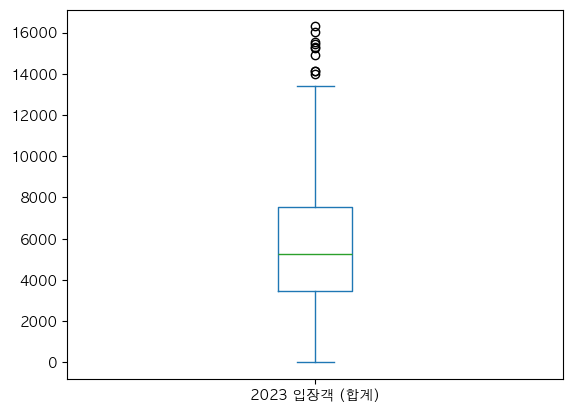

In [80]:
df_2023['합계'].plot(kind='box', label='2023 입장객 (합계)')
plt.show()

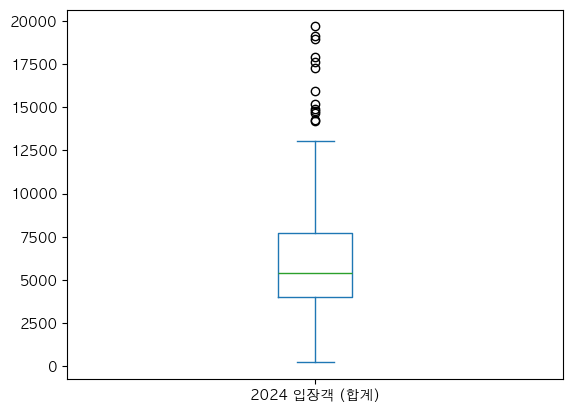

In [81]:
df_2024['합계'].plot(kind='box', label='2024 입장객 (합계)')

plt.show()

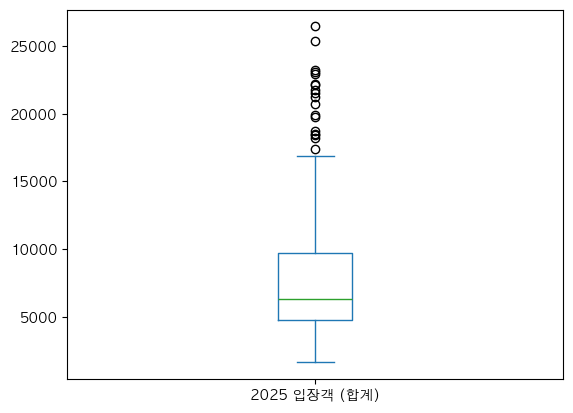

In [82]:
df_2025['합계'].plot(kind='box', label='2025 입장객 (합계)')
plt.show()

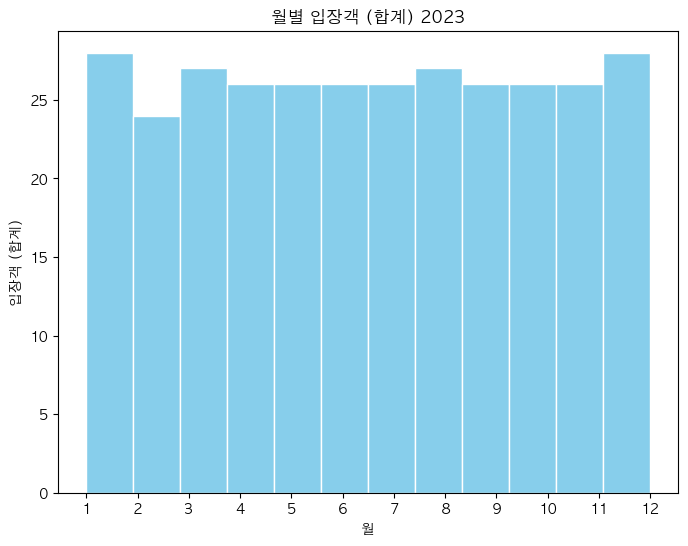

In [94]:
# histogram
plt.figure(figsize=(8, 6))
df_2023['일자'].dt.month.hist(bins=12, color='skyblue', edgecolor='white', grid=False)

plt.title('월별 입장객 (합계) 2023')
plt.xlabel('월')
plt.ylabel('입장객 (합계)')
plt.xticks(range(1, 13)) 
plt.show()

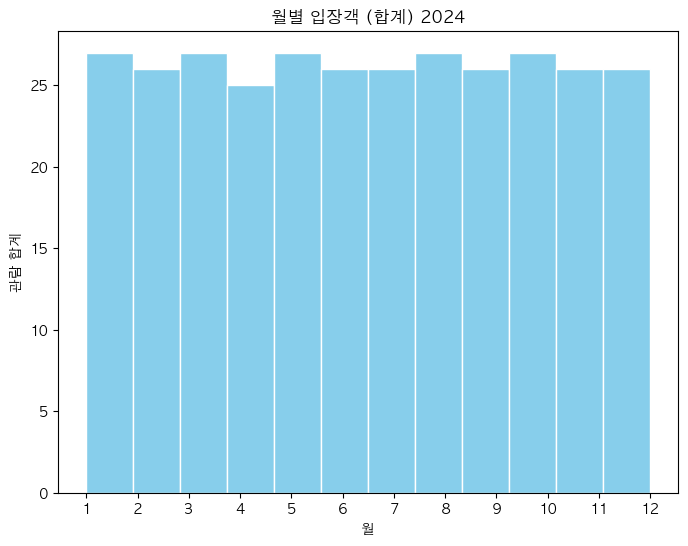

In [96]:
# histogram
plt.figure(figsize=(8, 6))
df_2024['일자'].dt.month.hist(bins=12, color='skyblue', edgecolor='white', grid=False)

plt.title('월별 입장객 (합계) 2024')
plt.xlabel('월')
plt.ylabel('관람 합계')
plt.xticks(range(1, 13)) 
plt.show()

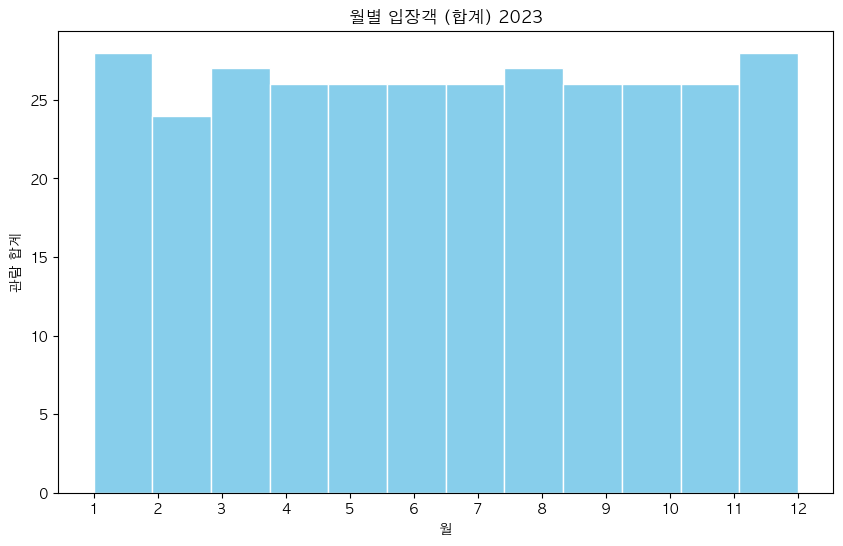

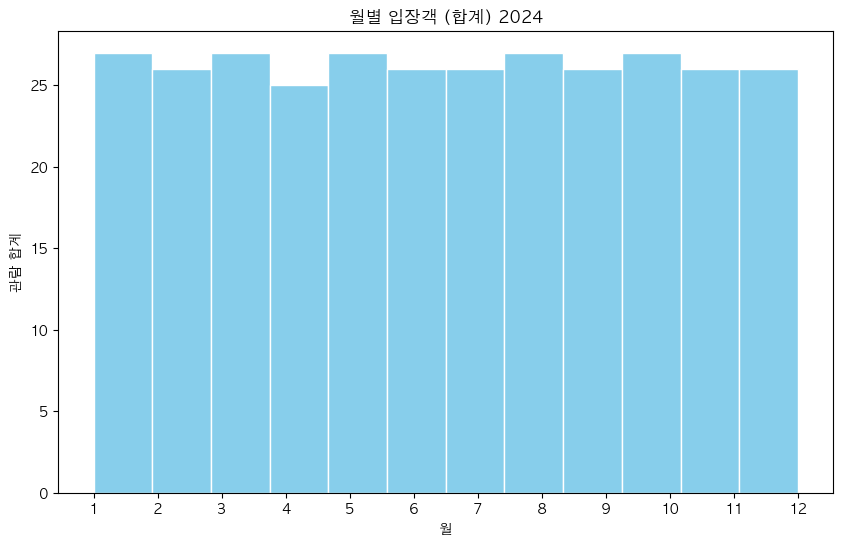

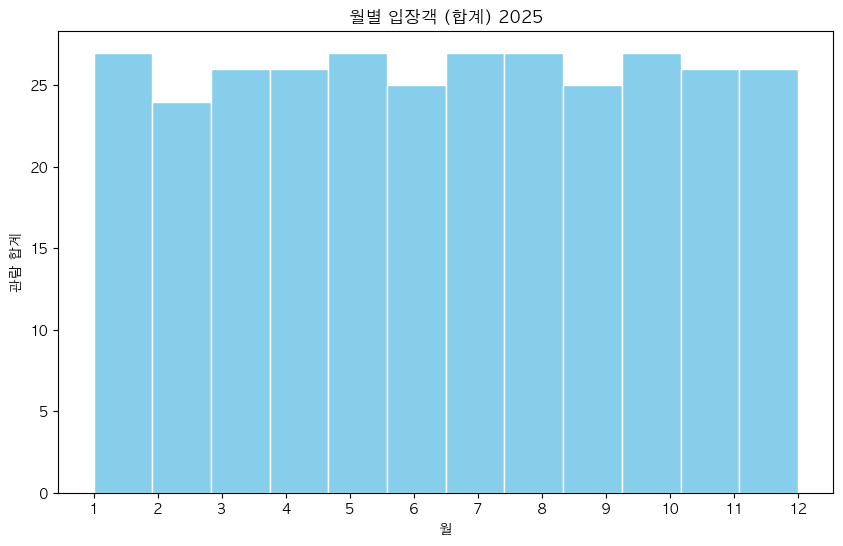

In [95]:
# histogram
def yearly_histogram(df, year): 
    plt.figure(figsize=(10, 6))
    df['일자'].dt.month.hist(bins=12, color='skyblue', edgecolor='white', grid=False)

    plt.title(f'월별 입장객 (합계) {year}')
    plt.xlabel('월')
    plt.ylabel('관람 합계')
    plt.xticks(range(1, 13)) 
    plt.show()

yearly_histogram(df_2023, "2023")
yearly_histogram(df_2024, "2024")
yearly_histogram(df_2025, "2025")

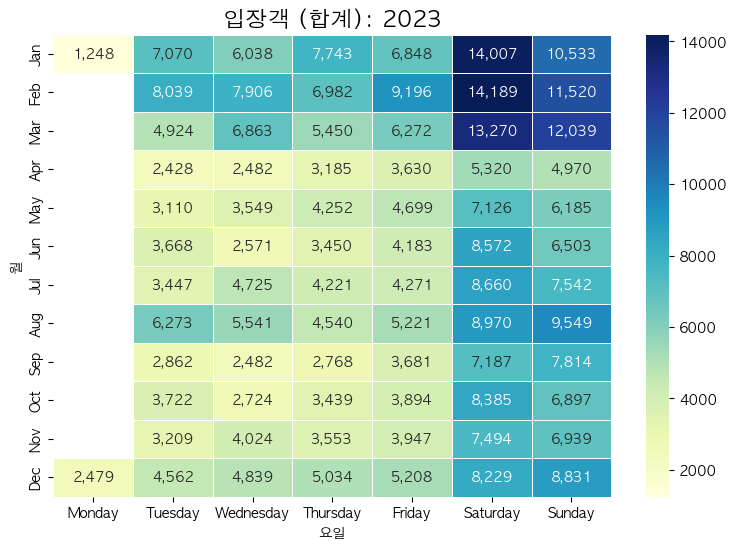

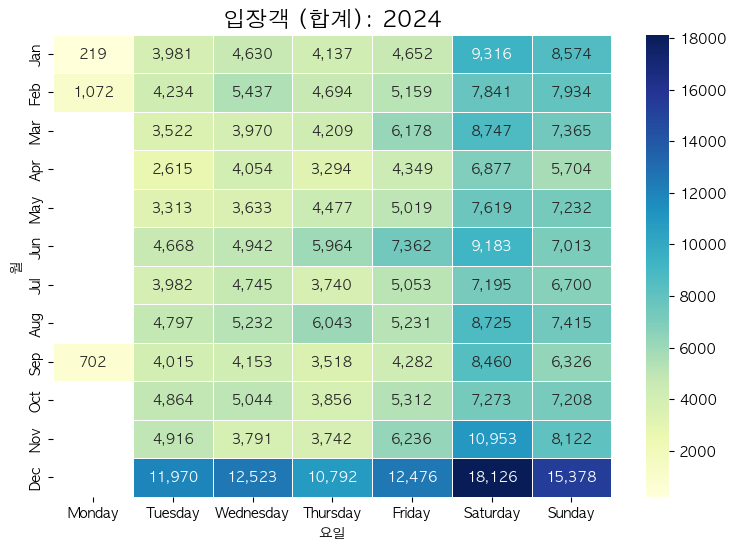

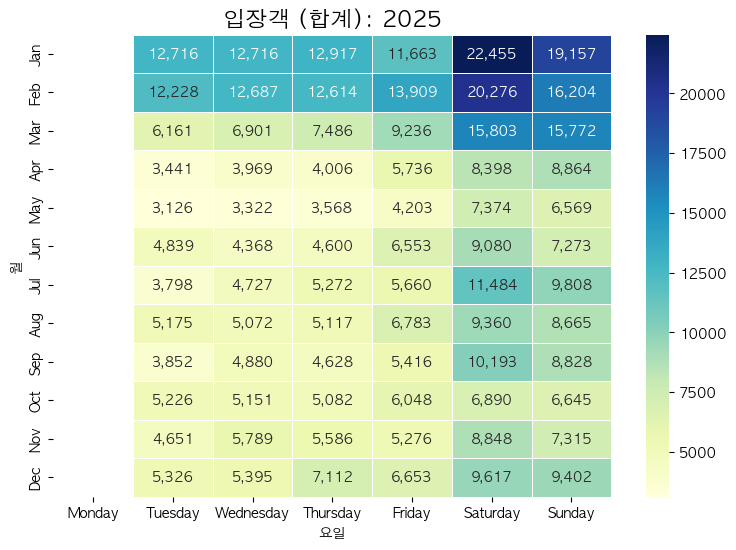

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt

def yearly_heatmap(df, year):
    # 1. Prepare data: ensure Month and Day Name exist
    df['월'] = df['일자'].dt.month
    df['요일'] = df['일자'].dt.day_name()
    
    # 평균
    pivot = df.pivot_table(index='월', 
                           columns='요일', 
                           values='합계', 
                           )
    
    day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    pivot = pivot.reindex(columns=day_order)
    
    month_names = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 
                   7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
    pivot.index = pivot.index.map(month_names)

    plt.figure(figsize=(9, 6))
    sns.heatmap(pivot, annot=True, fmt=',.0f', cmap='YlGnBu', linewidths=.5)
    plt.title(f'입장객 (합계): {year}', fontsize=16)
    plt.show()

yearly_heatmap(df_2023, "2023")
yearly_heatmap(df_2024, "2024")
yearly_heatmap(df_2025, "2025")